In [1]:
import time
nb_start_time = time.time()
print(time.ctime())

from keras.models import Model
from keras.layers import Input, LSTM, GRU
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.math import reduce_prod


Sat Mar 19 11:44:39 2022
Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
T = 8
D = 2
M = 3

In [3]:
X = np.random.randn(1, T, D)

In [4]:
X

array([[[-0.11330871,  0.30822039],
        [ 0.37285237,  0.27598081],
        [-1.33133078, -0.54797071],
        [-1.95521667,  0.09925075],
        [ 0.36046552,  1.15217117],
        [-0.52834152, -0.50276969],
        [-0.32427563,  0.90414241],
        [-1.01061231,  0.47860415]]])

In [5]:
def lstm1():
    input_ = Input(shape=(T,D))
    rnn = LSTM(M, return_state=True, return_sequences=False)
    x = rnn(input_)
    
    model = Model(inputs = input_, outputs=x)
    #print(model.predict(X))
    o, h, c = model.predict(X)
    print("actual output:", o)
    print("hidden state:", h)
    print("cell state:", c)
    

In [ ]:
print("lstm1")
lstm1()

lstm1
Metal device set to: Apple M1


2022-03-19 11:44:41.714828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-19 11:44:41.714921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


##### Since the number of nodes are 3 (M=3) each of these arrays are fof length 3. E.g, in the output,  0.0246452 is from the first node, 0.12440886 is from the second node and -0.01573339 is from the third node. 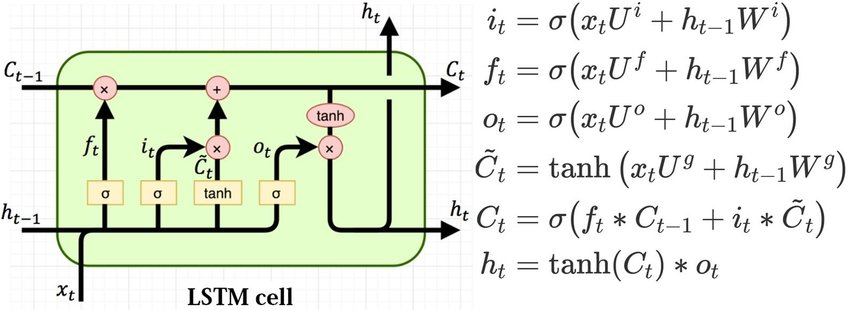

#### This image also explains you why the output is the same as hidden state. 
#### PS: The image contains only one node.

In [ ]:
def lstm2():
    input_ = Input(shape=(T,D))
    rnn = LSTM(M, return_state=True, return_sequences=True)
    x = rnn(input_)
    
    model = Model(inputs = input_, outputs=x)
    #print(model.predict(X))
    o, h, c = model.predict(X)
    print("actual output:", o)
    print("hidden state:", h)
    print("cell state:", c)
    

In [ ]:
print("lstm2")
lstm2()

#### Output returns intermediate states also. 8 outputs for 8 inputs

In [ ]:
def gru1():
    input_ = Input(shape=(T,D))
    rnn = GRU(M, return_state=True, return_sequences=False)
    x = rnn(input_)
    
    model = Model(inputs = input_, outputs=x)
    #print(model.predict(X))
    o, h = model.predict(X)
    print("actual output:", o)
    print("hidden state:", h)    

print("gru1")
gru1()

In [ ]:
def gru2():
    input_ = Input(shape=(T,D))
    rnn = GRU(M, return_state=True, return_sequences=True)
    x = rnn(input_)
    
    model = Model(inputs = input_, outputs=x)
    #print(model.predict(X))
    o, h = model.predict(X)
    print("actual output:", o)
    print("hidden state:", h)    

print("gru2")
gru2()

#### From the image, it is clear that why GRU returns only two values - output and hidden state 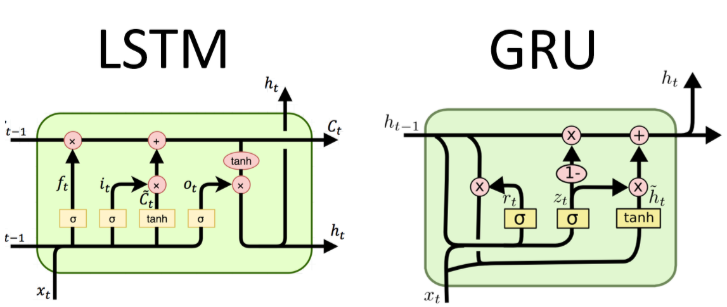

#### In case of return_sequences=True, note that the last element of the output is same as the hidden state. 